In [5]:
import pandas as pd
import numpy as np
import os

# Datei laden
df = pd.read_csv("data/train_data.csv")

# Formelkonstante
tau =292  # N/mm²

# Formel: d = 4 * sqrt(t), F_pull = (π / 4) * d² * τ
def compute_physical_pull(t):
    d = 4 * np.sqrt(t)
    return (np.pi / 4) * d ** 2 * tau

# Dünneres Blech bestimmen
df["Thickness_min (mm)"] = df[["Thickness A (mm)", "Thickness B (mm)"]].min(axis=1)

# Neue Spalte berechnen
df["F_pull_physical"] = compute_physical_pull(df["Thickness_min (mm)"])

# Neue Datei speichern
output_path = "data/train_data_with_physical_pull.csv"
df.to_csv(output_path, index=False)

print(f"✅ Datei gespeichert unter: {output_path}")


✅ Datei gespeichert unter: data/train_data_with_physical_pull.csv


In [6]:
import pandas as pd
import numpy as np

# Originale Datei laden
df = pd.read_csv("data/development_data.csv")

# Konstante für Schubfestigkeit
tau = 292  # N/mm²

# Formel zur Berechnung von F_pull_physical
def compute_physical_pull(t):
    d = 4 * np.sqrt(t)
    return (np.pi / 4) * d ** 2 * tau

# Dünneres Blech bestimmen
df["Thickness_min (mm)"] = df[["Thickness A (mm)", "Thickness B (mm)"]].min(axis=1)

# Neue Spalte berechnen
df["F_pull_physical"] = compute_physical_pull(df["Thickness_min (mm)"])

# Neue Datei speichern
df.to_csv("data/development_data_with_physical_pull.csv", index=False)
print("✅ Datei gespeichert: data/development_data_with_physical_pull.csv")

✅ Datei gespeichert: data/development_data_with_physical_pull.csv


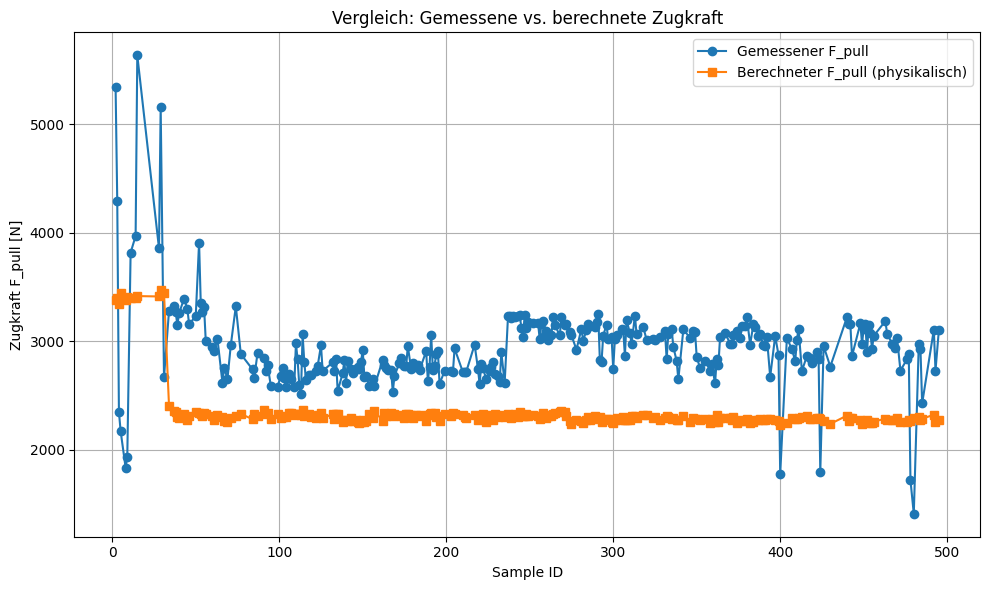

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Erweiterten Datensatz laden
df = pd.read_csv("data/train_data_with_physical_pull.csv")

# Nach Sample ID oder Index sortieren, damit die Linien nicht springen
df_sorted = df.sort_values("Sample ID")  # oder einfach df.sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Gemessener F_pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_physical"], label="Berechneter F_pull (physikalisch)", marker='s')

plt.xlabel("Sample ID")
plt.ylabel("Zugkraft F_pull [N]")
plt.title("Vergleich: Gemessene vs. berechnete Zugkraft")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


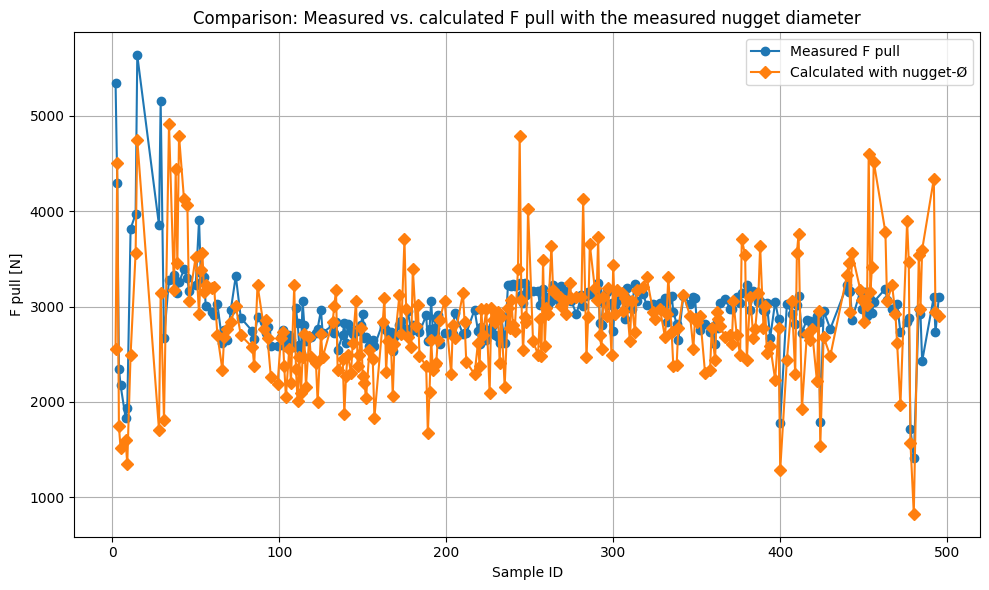

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv("data/train_data.csv")

df["Thickness_min (mm)"] = df[["Thickness A (mm)", "Thickness B (mm)"]].min(axis=1)

# Konstante Scherfestigkeit
tau = 292  # N/mm²

# Neue Spalte berechnen
df["F_pull_from_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"] ** 2 * tau

# Optional: neuen Datensatz speichern
df.to_csv("data/train_data_with_nugget_pull.csv", index=False)

# Plot: Vergleich tatsächlicher vs. berechneter Werte
df_sorted = df.sort_values("Sample ID")

plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Measured F pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_nugget"], label="Calculated with nugget-Ø", marker='D')

plt.xlabel("Sample ID")
plt.ylabel("F pull [N]")
plt.title("Comparison: Measured vs. calculated F pull with the measured nugget diameter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Parameter
tau = 292  # in N/mm²

# Daten laden
df = pd.read_csv("data/train_data.csv")

df["Thickness_min (mm)"] = df[["Thickness A (mm)", "Thickness B (mm)"]].min(axis=1)

# Berechnung basierend auf Gesamtdicke (Thickness A+B)
df["F_pull_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness_min (mm)"]))**2 * tau

# Berechnung basierend auf NuggetDiameter
df["F_pull_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"]**2 * tau

# Abweichung zum echten Wert
df["Abweichung_thickness"] = np.abs(df["PullTest (N)"] - df["F_pull_thickness"])
df["Abweichung_nugget"] = np.abs(df["PullTest (N)"] - df["F_pull_nugget"])

# Durchschnittliche Abweichung berechnen
mean_abs_error_thickness = df["Abweichung_thickness"].mean()
mean_abs_error_nugget = df["Abweichung_nugget"].mean()

print(f"Durchschnittliche Abweichung (Gesamtdicke): {mean_abs_error_thickness:.2f} N")
print(f"Durchschnittliche Abweichung (Nugget-Durchmesser): {mean_abs_error_nugget:.2f} N")

# Neue CSV speichern
df.to_csv("train_data_with_Fpull.csv", index=False)
print("Neue Datei gespeichert: train_data_with_Fpull.csv")


Durchschnittliche Abweichung (Gesamtdicke): 656.29 N
Durchschnittliche Abweichung (Nugget-Durchmesser): 373.68 N
Neue Datei gespeichert: train_data_with_Fpull.csv


Durchschnittliche Abweichung (Gesamtdicke): 656.29 N
Durchschnittliche Abweichung (Nugget-Durchmesser): 373.68 N


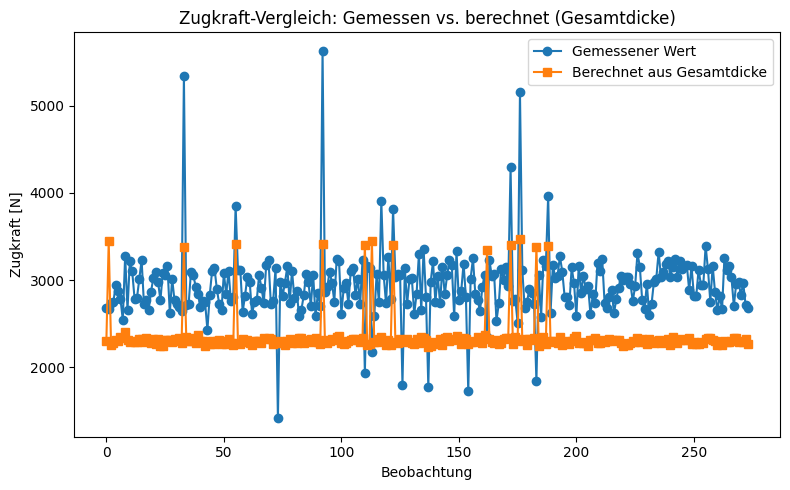

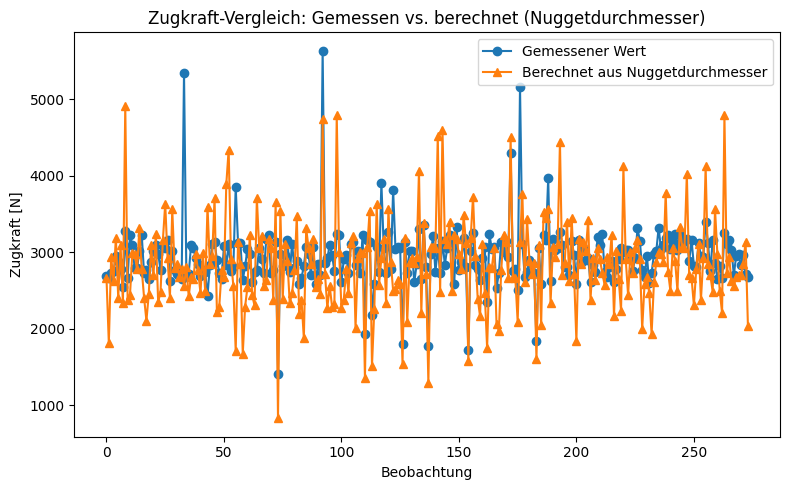

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameter
tau = 292  # in N/mm²

# Daten laden
df = pd.read_csv("data/train_data.csv")

df["Thickness_min (mm)"] = df[["Thickness A (mm)", "Thickness B (mm)"]].min(axis=1)

# Berechnung basierend auf Gesamtdicke (Thickness A+B)
df["F_pull_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness_min (mm)"]))**2 * tau

# Berechnung basierend auf NuggetDiameter
df["F_pull_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"]**2 * tau

# Abweichungen berechnen
df["Abweichung_thickness"] = np.abs(df["PullTest (N)"] - df["F_pull_thickness"])
df["Abweichung_nugget"] = np.abs(df["PullTest (N)"] - df["F_pull_nugget"])

# Durchschnittliche Abweichung
mean_abs_error_thickness = df["Abweichung_thickness"].mean()
mean_abs_error_nugget = df["Abweichung_nugget"].mean()

print(f"Durchschnittliche Abweichung (Gesamtdicke): {mean_abs_error_thickness:.2f} N")
print(f"Durchschnittliche Abweichung (Nugget-Durchmesser): {mean_abs_error_nugget:.2f} N")

# Ergebnisse speichern
df.to_csv("train_data_with_Fpull.csv", index=False)

# Plot 1: F_pull (Thickness) vs PullTest
plt.figure(figsize=(8, 5))
plt.plot(df["PullTest (N)"], label="Gemessener Wert", marker="o")
plt.plot(df["F_pull_thickness"], label="Berechnet aus Gesamtdicke", marker="s")
plt.xlabel("Beobachtung")
plt.ylabel("Zugkraft [N]")
plt.title("Zugkraft-Vergleich: Gemessen vs. berechnet (Gesamtdicke)")
plt.legend()
plt.tight_layout()
plt.savefig("vergleich_thickness.png")
plt.show()

# Plot 2: F_pull (Nugget) vs PullTest
plt.figure(figsize=(8, 5))
plt.plot(df["PullTest (N)"], label="Gemessener Wert", marker="o")
plt.plot(df["F_pull_nugget"], label="Berechnet aus Nuggetdurchmesser", marker="^")
plt.xlabel("Beobachtung")
plt.ylabel("Zugkraft [N]")
plt.title("Zugkraft-Vergleich: Gemessen vs. berechnet (Nuggetdurchmesser)")
plt.legend()
plt.tight_layout()
plt.savefig("vergleich_nugget.png")
plt.show()


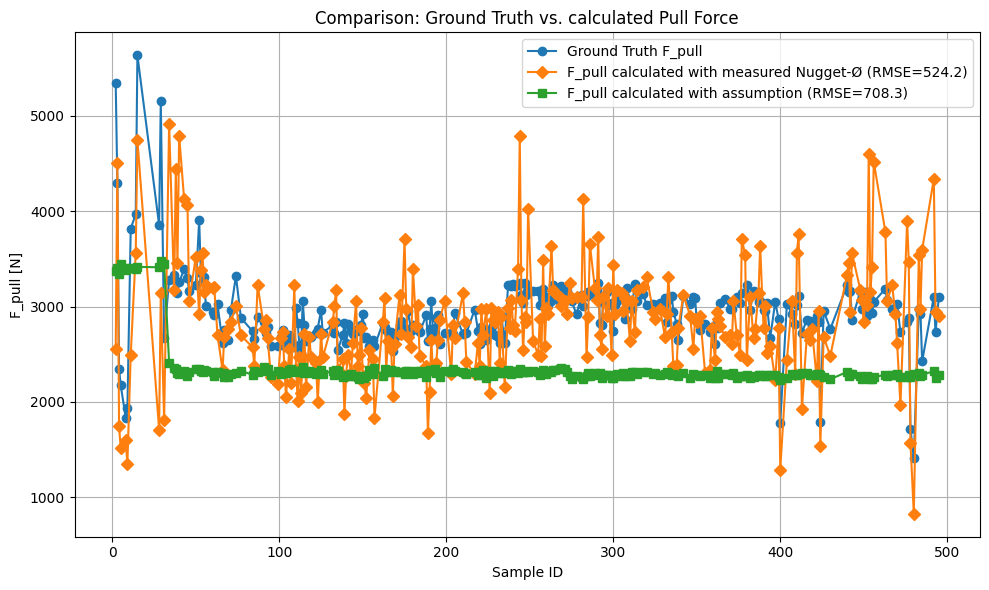

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("data/train_data.csv")

# Konstante Scherfestigkeit
tau = 292  # N/mm²

df["Thickness_min (mm)"] = df[["Thickness A (mm)", "Thickness B (mm)"]].min(axis=1)

# Berechnete Zugkraft basierend auf Nuggetdurchmesser
df["F_pull_from_nugget"] = (np.pi / 4) * df["NuggetDiameter (mm)"] ** 2 * tau

# Berechnete Zugkraft basierend auf Gesamtdicke
df["F_pull_from_thickness"] = (np.pi / 4) * (4 * np.sqrt(df["Thickness_min (mm)"])) ** 2 * tau

# RMSE berechnen
rmse_nugget = np.sqrt(np.mean((df["PullTest (N)"] - df["F_pull_from_nugget"])**2))
rmse_thickness = np.sqrt(np.mean((df["PullTest (N)"] - df["F_pull_from_thickness"])**2))

# Nach Sample ID sortieren
df_sorted = df.sort_values("Sample ID")

# Optional: neuen Datensatz mit berechneten Werten speichern
df_sorted.to_csv("data/train_data_with_all_fpull.csv", index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["Sample ID"], df_sorted["PullTest (N)"], label="Ground Truth F_pull", marker='o')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_nugget"], label=f"F_pull calculated with measured Nugget-Ø (RMSE={rmse_nugget:.1f})", marker='D')
plt.plot(df_sorted["Sample ID"], df_sorted["F_pull_from_thickness"], label=f"F_pull calculated with assumption (RMSE={rmse_thickness:.1f})", marker='s')

plt.xlabel("Sample ID")
plt.ylabel("F_pull [N]")
plt.title("Comparison: Ground Truth vs. calculated Pull Force")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("vergleich_fpull_berechnungen.png")
plt.show()